In [ ]:
# Importa bibliotecas
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as pyp

# Importa dados
dados = pd.read_csv(filepath_or_buffer = "https://aluno.analisemacro.com.br/download/47784/?tmstv=1678715174") # arquivo dados.csv

# Estima modelo ("ols" descreve o modelo e "fit" o estima)
modelo = smf.ols("y ~ tempo", data = dados).fit()

# Imprime os coeficientes estimados
modelo.params

# Extrai o ajuste do modelo
ajuste = modelo.fittedvalues

# Cria nova coluna com os valores de ajuste e transforma coluna data para YYYY-MM-DD
dados["tendencia"] = ajuste
dados["data"] = pd.PeriodIndex(
    data = dados["data"].str.replace(" ", "-"),
    freq = "Q"
    ).to_timestamp()

# Cria gráfico de linha (valores observados e reta de ajuste)
g1 = px.line( # para criar gráfico de linha
    data_frame = dados, # tabela DataFrame de dados
    y = "y", # eixo Y
    x = "data", # eixo X
    title = "PIB do Brasil", # título do gráfico
    color = px.Constant("PIB"), # nome da série na legenda
    color_discrete_sequence = ["#282f6b"],
    labels = dict(data = "", y = "Índice", color = "")  # título do eixo X, Y e da legenda
    )

g1.add_annotation( # adiciona texto de subtítulo
    text = "Preços de mercado, nº índice sazonalmente ajustado (média de 1995 = 100)",
     y = 1.1,
     x = -0.11,
     yref = "paper",
     xref = "paper",
     showarrow = False
     )

g1.add_annotation(  # adiciona e posiciona texto de fonte de dados
    showarrow = False,
    text = "Dados: IBGE | Elaboração: analisemacro.com.br",
    x = 1,
    xref = "paper",
    y = -0.18,
    yref = "paper"
    )

g1.add_scatter( # adiciona linha de tendência
    x = dados["data"],
    y = dados["tendencia"],
    name = "Tendência linear",
    line = dict(color = "#b22200") # cor da nova linha
    )

g1.show()

# PIB versus Inflacao

**IMPORTANDO PACOTES**

In [ ]:
pip install sidrapy

In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

**CARREGANDO BIBLIOTECAS**

In [ ]:
import sidrapy
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pyp

**COLETANDO DADOS**

In [ ]:
ipca_a = sidrapy.get_table(table_code = '1737',
                          territorial_level = '1',
                          ibge_territorial_code = 'all',
                          variable = '2265',
                          period = 'all',
                          header = 'n')

In [ ]:
ipca_a

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,1,Brasil,,,...,1,Brasil,197912,dezembro 1979,2265,IPCA - Variação acumulada em 12 meses
1,1,Brasil,,,...,1,Brasil,198001,janeiro 1980,2265,IPCA - Variação acumulada em 12 meses
2,1,Brasil,,,...,1,Brasil,198002,fevereiro 1980,2265,IPCA - Variação acumulada em 12 meses
3,1,Brasil,,,...,1,Brasil,198003,março 1980,2265,IPCA - Variação acumulada em 12 meses
4,1,Brasil,,,...,1,Brasil,198004,abril 1980,2265,IPCA - Variação acumulada em 12 meses
...,...,...,...,...,...,...,...,...,...,...,...
527,1,Brasil,2,%,4.68,1,Brasil,202311,novembro 2023,2265,IPCA - Variação acumulada em 12 meses
528,1,Brasil,2,%,4.62,1,Brasil,202312,dezembro 2023,2265,IPCA - Variação acumulada em 12 meses
529,1,Brasil,2,%,4.51,1,Brasil,202401,janeiro 2024,2265,IPCA - Variação acumulada em 12 meses
530,1,Brasil,2,%,4.50,1,Brasil,202402,fevereiro 2024,2265,IPCA - Variação acumulada em 12 meses


**LIMPEZA  E TRANSFORMACAO DE DADOS**

In [ ]:
ipca = (
    ipca_a
    .loc[0:, ['V', 'D2C']]
    .rename(columns = {'V': 'ipca',
                       'D2C': 'data'})
)

In [ ]:
ipca =  ipca.loc[ipca.data >= '2004-01-01']

In [ ]:
ipca['data'] = pd.to_datetime(ipca['data'],
                              format ='%Y%m')

In [ ]:
ipca['ipca'] = ipca['ipca'].astype(float)

In [ ]:
ipca.describe()

,ipca,data
count,243.000000,243
mean,5.760905,2014-01-30 14:48:53.333333248
min,1.880000,2004-01-01 00:00:00
25%,4.270000,2009-01-16 12:00:00
50%,5.590000,2014-02-01 00:00:00
75%,6.695000,2019-02-15 00:00:00
max,12.130000,2024-03-01 00:00:00
std,2.137610,NaN


**GRÁFICOS**

<Axes: xlabel='data', ylabel='ipca'>

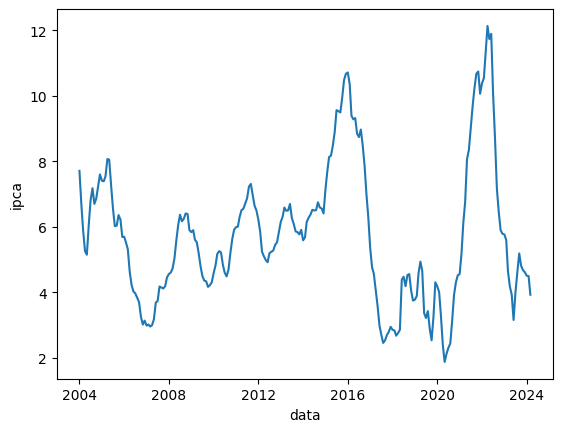

In [ ]:
sns.lineplot(x = 'data',
             y = 'ipca',
             data = ipca)

<Axes: xlabel='ipca', ylabel='Count'>

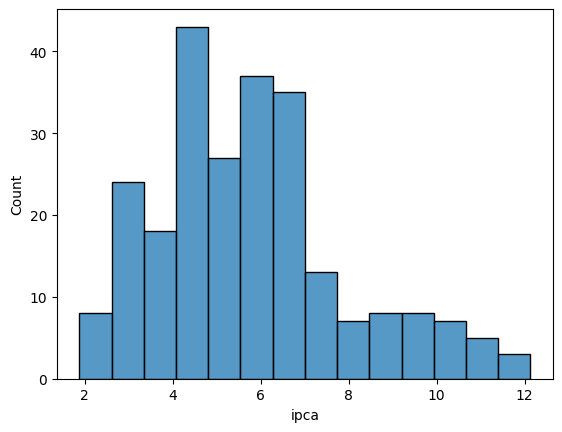

In [ ]:
sns.histplot(x = 'ipca',
             data =  ipca)

<Axes: ylabel='ipca'>

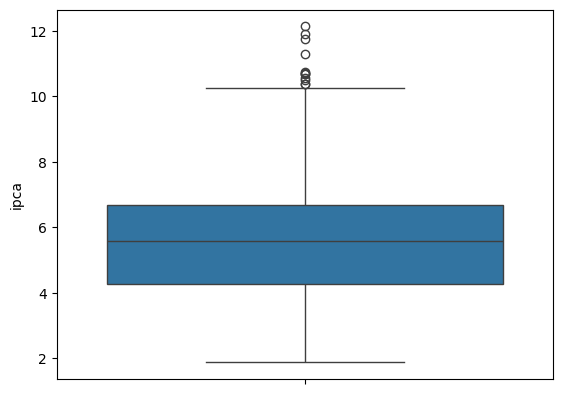

In [ ]:
sns.boxplot(y = 'ipca',
            data = ipca)

**MODELAGEM DE DADOS**

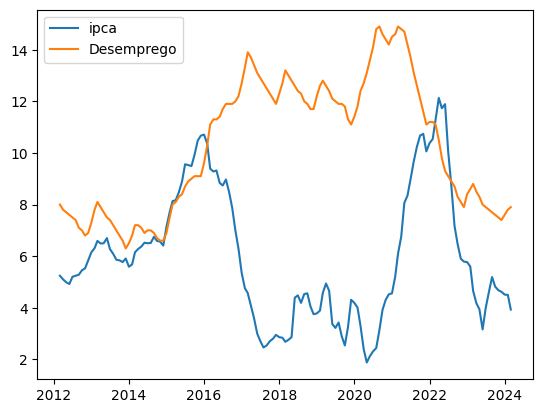

In [ ]:
# Taxa de desocupação - % - PNADC-M/IBGE
desocupacao_raw = sidrapy.get_table(table_code= "6381",
                                    territorial_level = "1",
                                    ibge_territorial_code = "all",
                                    variable = "4099",
                                    period = "all",
                                    header ='n')
# Realiza a limpeza e manipulação da tabela
desocupacao =  (
     desocupacao_raw
    .loc[0:,['V', 'D2C']]
    .rename(columns = {'V': 'desocupacao',
                       'D2C': 'data'}
            )
      )
# Transforma a coluna date em tipo datetime
desocupacao['data'] = pd.to_datetime(desocupacao['data'],
                                format = "%Y%m")
# Transforma a coluna desocupacao em tipo float
desocupacao['desocupacao'] = desocupacao['desocupacao'].astype(float)
# Filtra os dados
desocupacao = desocupacao.loc[desocupacao.data > '2004-01-01']

## juntar os dados
df_dados = pd.merge(ipca, desocupacao, on = 'data')
## Gráfico
pyp.plot('data',
         'ipca',
         data = df_dados,
         label = 'ipca')
pyp.plot('data',
         'desocupacao',
         data = df_dados,
         label = 'Desemprego')
pyp.legend()

**ANÁLISE EXPLORATÓRIA E QUANTITATIVA**

In [ ]:
import statsmodels.formula.api as smf
# Estima modelo ("ols" descreve o modelo e "fit" o estima)
modelo = smf.ols("ipca ~ desocupacao", data = df_dados).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ipca   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     7.810
Date:                Mon, 06 May 2024   Prob (F-statistic):            0.00591
Time:                        14:40:48   Log-Likelihood:                -336.22
No. Observations:                 145   AIC:                             676.4
Df Residuals:                     143   BIC:                             682.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2408      0.839      9.818      0.000       6.582       9.900
desocupacao    -0.2217      0.079     -2.795      0.006      -0.379      -0.065
==============================================================================
Omnibus:                       16.180   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.399
Skew:                           0.845   Prob(JB):                     0.000101
Kurtosis:                       2.565   Cond. No.                         43.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

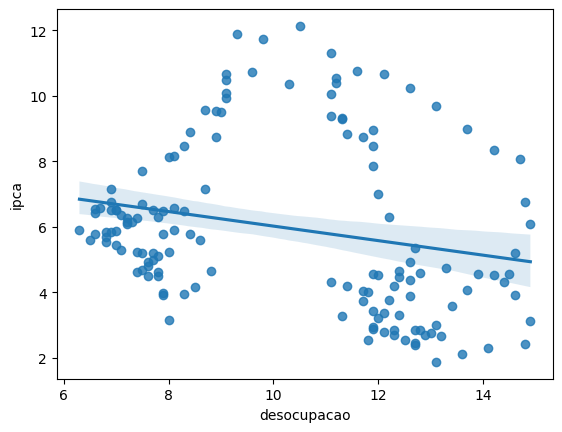

In [ ]:
dispersao = sns.regplot(x = 'desocupacao',
            y = 'ipca',
            data = df_dados)